In [24]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [15]:
mnist=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

#normalize
X_train=X_train/255.0
X_test=X_test/255.0



5


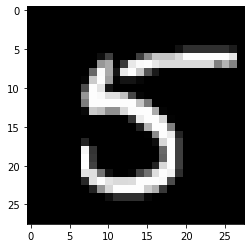

In [27]:
plt.imshow(X_train[0],cmap='gray')
print(Y_train[0])

In [16]:

X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)



In [17]:
model=tf.keras.models.Sequential([
       #feature extraction                           
       layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
       layers.MaxPooling2D(),
       layers.Conv2D(64,(3,3),activation='relu'),
       layers.MaxPooling2D(),
       layers.Conv2D(64,(5,5),activation='relu'),
       layers.Flatten(),

       #classification
       layers.Dense(64,activation='relu'),
       layers.Dense(10,activation='softmax')


                                  ])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 64)          102464    
                                                                 
 flatten_1 (Flatten)         (None, 64)               

In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

   

In [20]:
model.fit(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val))


Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 2.2464 - accuracy: 0.2109 - val_loss: 2.1513 - val_accuracy: 0.3260
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 1.6936 - accuracy: 0.5679 - val_loss: 0.9667 - val_accuracy: 0.7736
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6487 - accuracy: 0.8258 - val_loss: 0.4799 - val_accuracy: 0.8638
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4313 - accuracy: 0.8735 - val_loss: 0.3772 - val_accuracy: 0.8914
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3540 - accuracy: 0.8953 - val_loss: 0.3160 - val_accuracy: 0.9103
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3057 - accuracy: 0.9097 - val_loss: 0.2747 - val_accuracy: 0.9214
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2695 - accuracy: 0.9190 - val_loss: 0.2499 - val_ac

In [21]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1693 - accuracy: 0.9492


[0.1692640334367752, 0.9491999745368958]

In [22]:
import cv2
img=cv2.imread('img3.png')
img=cv2.resize(img,(28,28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img=img/255.0
img=img.reshape(1,28,28)
result=model.predict([img])
np.argmax(result)

3

In [23]:
import cv2
img=cv2.imread('img6.png')
img=cv2.resize(img,(28,28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img=img/255.0
img=img.reshape(1,28,28)
result=model.predict([img])
np.argmax(result)

6